![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 6: Ensemble Methods

In this module, we look how several machine learning algorithms can be combined in order to improve generalizability / robustness over a single algorithm. 

## Ensemble Methods

The goal of ensemble methods is to combine multiple machine learning models into one predictive model with the aim of decreasing variance, bias, or to improve predictions. There are several ways of categorizing ensemble methods. We shall be looking at the categorization from the perspective of *how* algorithms are combined. For that, there are three types:

1. **Parallel** ensemble methods -- where the individual learning algorithms (or sometimes called *base learners* or *base estimators*) are performed in parallel (e.g. <font color="red">Random Forest classifier, Bagging methods</font>). The driving principle here is to build several estimators independently and parallelly, and then average their predictions. This exploits the independence between base learners since its variance can be dramatically reduced through averaging.

2. **Sequential** ensemble methods -- where the individual learning algorithms are performed sequentially (e.g. <font color="red">AdaBoost, Gradient Tree Boosting</font>). The primary motivation of sequential methods is to exploit the dependence between several estimators. The overall performance can be boosted by weighing previously mislabeled examples with higher weight, hence reducing the bias of the individual estimators. 

3. **Stacking** ensemble methods -- where algorithms/learners of different types  heterogeneous learners, i.e. learners of different types, are combined leading to heterogeneous ensembles. In order for these methods to be more accurate than any of its individual members, the base learners have to be as accurate and as diverse as possible.


## Sources of Error

When learning models and forming predictions, there are three sources of errors that contribute towards ineffective models:
1. Noise
2. Bias
3. Variance

### Noise

Data is inherently noisy. Sometimes, there is little that can be done to correct noisy data that has not been properly extracted or acquired (unless we have the knowledge of what went wrong during the data collection stage that can be reversed globally throughout the dataset). Missing data, or badly formatted or unvalidated data can be handled through the data cleaning process or some pre-processing steps that we can take before performing machine learning. Noise errors are also considered as *irreducible errors*.

### Bias

**Bias** is an error which arises from erroneous assumptions in the learning algorithm towards the data. A model that is not complex enough may not be able to capture the actual dimensionality of the data. For e.g. data that is distributed non-linearly (say, quadratic or cubic in nature) cannot be properly separated using a simple linear classifier, hence, we say the classifier is "not complex" enough. Therefore, this results in a "high bias" error, which can cause an algorithm to miss the relevant relations between features and target outputs. A commonly encountered term is "underfitting", which literally means the learned function does not fits the data well enough. Typically, the training error remains high no matter how to attempt to tune the hyperparameters.

### Variance

**Variance** is an error which arises from the sensitivity to small fluctuations in the training set. A model that is too complex may be too sensitive to possible differences from unseen data. For e.g. a model or function that has been trained to map every single training data point may be result in a lot of errors when predicting new data, hence, we say the classifier is "too complex". High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs. A commonly encountered term is "overfitting", which literally means the learned function is fitting too tightly, or too well, to the target outputs in the training set. Typically, we can observe that the the test error is way higher than the training error.

This is best describe by the following graph:

![](resources/Bias-Variance-Tradeoff.png)


where model complexity can be explained, for example, by using the polynomial degree of the proposed model (the higher the polynomial degree, the higher the complexity. Error is the difference between actual and predicted value. 

Now, let's look at the first ensemble method, Bagging.

## Bagging

Bagging stands for *bootstrap aggregation*. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train $M$ different trees on different subsets of the data (chosen randomly with replacement, also known as *bootstrapping*) and compute the ensemble of classifiers. With bootstrapping, the data in the sampled subsets are repeatable. For aggregating the outputs of base learners, bagging uses *voting* for classification and *averaging* for regression.

So basically, execute a few classification modeling, then average the prediction? What do you all think?

Let's study bagging in the context of classification on the Iris dataset. Let's select two base learners: A decision tree and a kNN classifier.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import itertools
from sklearn import tree
import graphviz

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target

clfNew = DecisionTreeClassifier()
clfNew.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

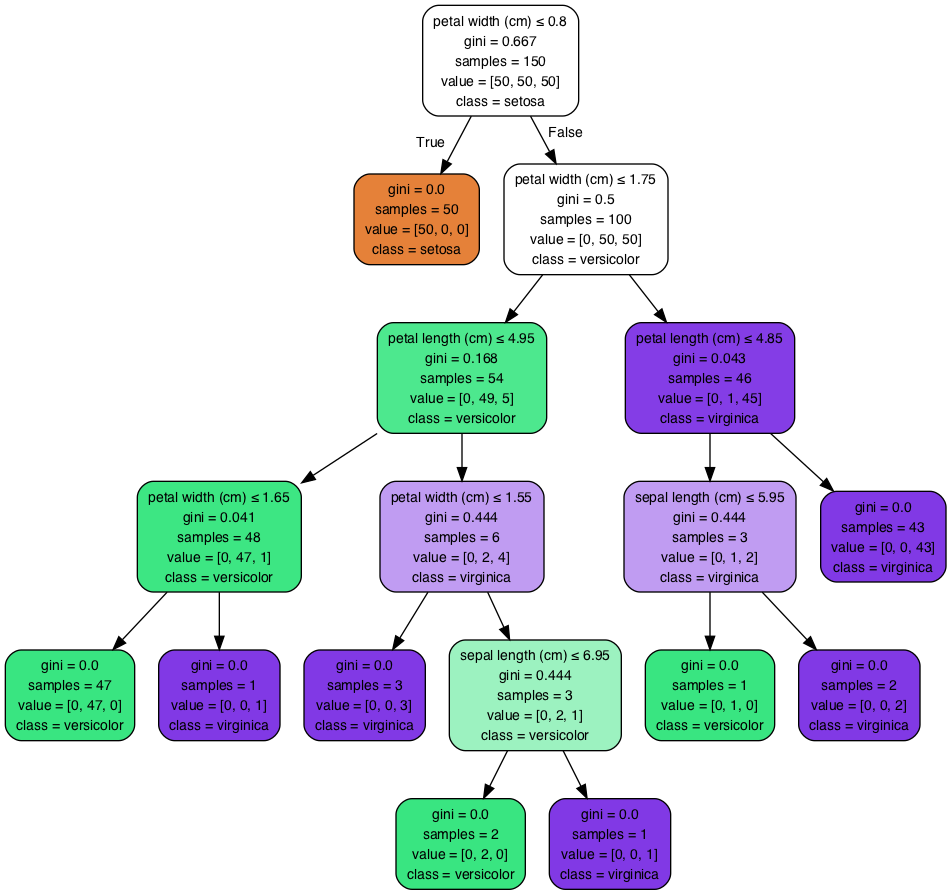

In [7]:
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()
export_graphviz(clfNew, out_file = dot_data,
                          feature_names= iris.feature_names,
                          class_names= iris.target_names,
                          filled= True, rounded= True,
                          special_characters = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 



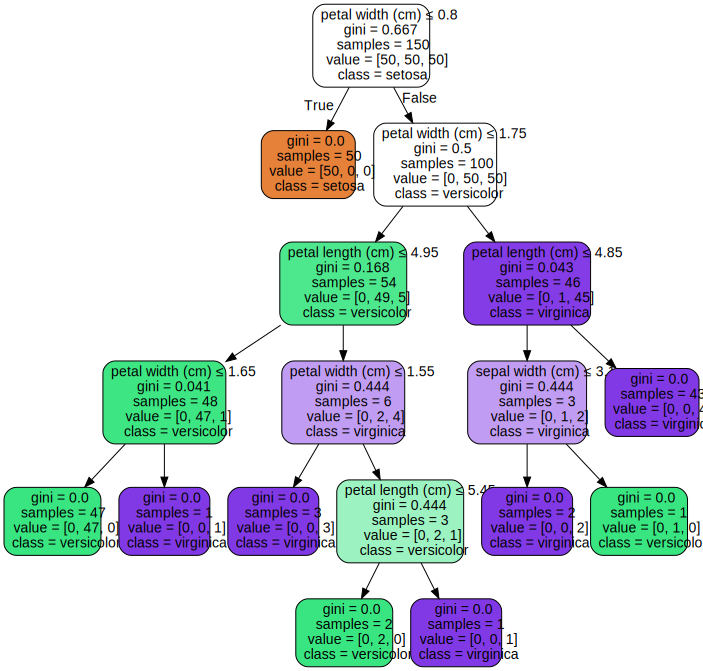

In [4]:
dot_data2 = tree.export_graphviz(clfNew, out_file = None,
                          feature_names= iris.feature_names,
                          class_names= iris.target_names,
                          filled= True, rounded= True,
                          special_characters = True)
graph2 = graphviz.Source(dot_data2)
graph2

In [9]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, 
                             n_estimators=10, 
                             max_samples=0.8, 
                             max_features=0.8)

bagging2 = BaggingClassifier(base_estimator=clf2, 
                             n_estimators=10, 
                             max_samples=0.8, 
                             max_features=0.8)

The `BaggingClassifier` takes the base estimator and runs it 10 times, by randomly sampling 80% of all samples, and 80% of all features for training. A vote is then taken from among the outputs to produce the final prediction.

To make plotting easy, the function `plot_2d_classification()` which we used in the last module to plot decision boundary and class regions has been moved to a separate file named `helper_plots.py`. All we need to do now is to import the function for use over here!   

In [36]:
for x in range(2):
    print (x)

0
1


[Refer to itertools.product documentation](https://docs.python.org/3/library/itertools.html#itertools.product)

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.70 (+/- 0.02) [K-NN]
Accuracy: 0.64 (+/- 0.05) [Bagging Tree]
Accuracy: 0.61 (+/- 0.03) [Bagging K-NN]


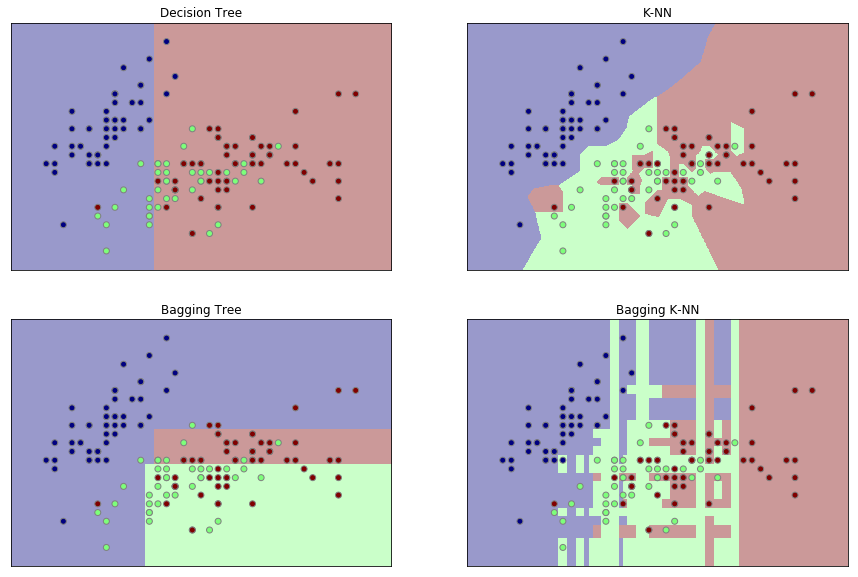

In [10]:
from helper_plots import plot_2d_classification # importing own functions from selfmade .py (helper_plots)
import pickle

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

#Figure size
fig = plt.figure(figsize=(15, 10))
#number of nrows/ncolumns
gs = gridspec.GridSpec(2, 2)

#for example :product(A, B) returns the same as ((x,y) for x in A for y in B).
grid = itertools.product([0,1],repeat=2) # --> [(0,0),(0,1),(1,0),(1,1)]

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_2d_classification(clf, X, ax=ax, alpha=.4)
    sc = ax.scatter(X[:,0], X[:,1], c=y, cmap='jet', edgecolors='grey')
    plt.title(label)
    
    # to save the model that we built, using "import pickle".
    # pickle stores the model
    filename = label+'.dat'
    pickle.dump(clf,open(filename,'wb'))

plt.show()

What we see is the decision tree showing a single boundary (due to the setting we used) while the nearest neighbor method has a very close fit since $k=1$. Using bagging ensemble on the decision tree seems to work amazingly well in comparison to kNN bagging because kNN is known to be less sensitive to perturbation of training samples and commonly known as *stable learners* (Note: you can randomly shift your data points slightly, and your kNN might still work more or less the same). Combining stable learners will not bring much benefit since the the bagging operation will not improve its generalization ability by much.

Here's a function to plot a learning curve of error

/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/s

[Training size: 0.1]
[Training size: 0.2]
[Training size: 0.3]
[Training size: 0.4]
[Training size: 0.5]
[Training size: 0.6]
[Training size: 0.7]
[Training size: 0.8]
[Training size: 0.9]


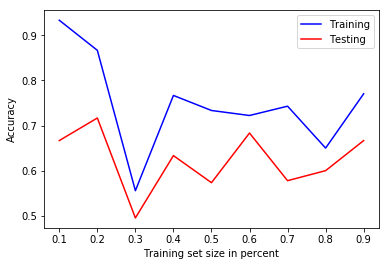

In [11]:
def plot_learning_curve(clf, X, y, intv=0.1):
    
    train_acc = []
    test_acc = []
    for i in range(1,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            train_size=i/10, 
                                                            stratify=y, random_state=42)
        #scores_train = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
        print("[Training size: %.1f]" %(i/10))
        #print("Training accuracy: %.2f (+/- %.2f)" %(scores_train.mean(), scores_train.std()))
        #train_acc.append(scores_train.mean())
        clf.fit(X_train, y_train)
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
        #
        #print("Test accuracy: %.2f (+/- %.2f)" %(scores_test.mean(), scores_test.std()))
        
    fig, ax = plt.subplots()
    ax.plot(np.arange(0.1,1.0,0.1), train_acc, 'b-', label='Training')
    ax.plot(np.arange(0.1,1.0,0.1), test_acc, 'r-', label = 'Testing')
    plt.legend(loc='upper right', fontsize=10)
    plt.xlabel('Training set size in percent')
    plt.ylabel('Accuracy')
    
plot_learning_curve(bagging1, X, y)

**Q1:** Write a function to show how test accuracy performs with the size of the ensemble (the number of base learners).

/Users/premchandran/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


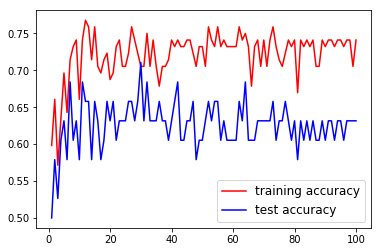

In [14]:
# this is the manual test/train split method with cross-validation

X, y = iris.data[:, 0:2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)
train_acc_me = []
test_acc_me = []
size_range = range (1,101)

for i in size_range:
    clf_me = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    bag_me = BaggingClassifier(base_estimator=clf_me, 
                               n_estimators=i, 
                               max_samples=0.8, 
                               max_features=0.8)
    bag_me.fit(X_train, y_train)
    train_acc_me.append(bag_me.score(X_train, y_train))
    test_acc_me.append(bag_me.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(size_range,train_acc_me,'r-',label ='training accuracy')
ax.plot(size_range,test_acc_me,'b-', label ='test accuracy')
ax.legend(loc='lower right', fontsize=12)

In [ ]:
# use: scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
# this is for automated test,train,cross-validate

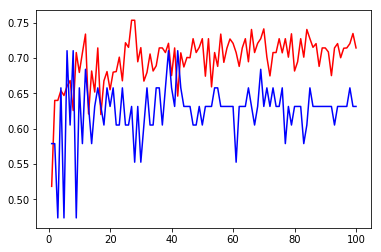

In [42]:
#FOR EXTRA WORK

X, y = iris.data[:, 0:2], iris.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)
acc_me2 = []
size_range = range (1,101)

for i in size_range:
    clf_me = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    bag_me = BaggingClassifier(base_estimator=clf_me, 
                               n_estimators=i, max_samples=0.8, 
                               max_features=0.8)
#    bag_me.fit(X_train, y_train)
#    train_acc_me.append(bag_me.score(X_train, y_train))
#    test_acc_me.append(bag_me.score(X_test, y_test))
    scores = cross_val_score(bag_me,X,y,cv=3,scoring='accuracy')
    acc_me2.append(scores.mean())

fig, ax = plt.subplots()
ax.plot(size_range,acc_me2,'r-')
ax.plot(size_range,test_acc_me,'b-')

**Q2**: Move some of these functions to the `helper_plots.py` file so that they can be easily used for future plotting.

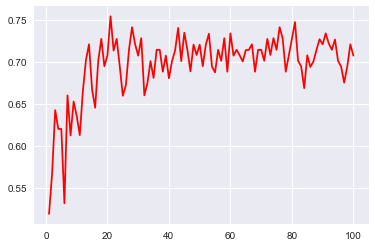

In [11]:
#FOR EXTRA WORK

import helper_plots as hp
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
size_range = range (1,101)
clf_me = DecisionTreeClassifier(criterion='entropy', max_depth=1)

hp.ensemble_accuracy(clf_me,X,y,size_range)

### Random Forests

A commonly used class of ensemble algorithms are forests of randomized trees, better known as "random forests". In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e. a bootstrap sample) from the training set. In addition, instead of using all the features, a random subset of features is selected further randomizing the tree. As a result, the bias of the forest increases slightly but due to averaging of less correlated trees, its variance decreases can result in an overall better model. Scikit-learn's implementation combines the classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

![](resources/random-forests.png)

### Extremely Randomized Trees

In extremely randomized trees (see `ExtraTreesClassifier` and `ExtraTreesRegressor` classes), randomness goes one step further in the way the individual tree splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print("Decision Trees: ",scores.mean())   

clf4 = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf4, X, y)
print("Random Forests: ",scores.mean())

clf5 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf5, X, y)
print("Extremely Random Trees: ",scores.mean())

Decision Trees:  0.698937908497
Random Forests:  0.686683006536
Extremely Random Trees:  0.705882352941


Explore the many parameters that are available with Random Forests in scikit-learn:
* n_estimators
* max_features
* max_depth
* min_sample_split
* oob_score

In [13]:
clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=None, 
                             min_samples_split=2, 
                             random_state=0)
scores = cross_val_score(clf, X, y)
print("Random Forests: ",scores.mean())

Random Forests:  0.718954248366


## AdaBoost

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. 

The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, \ldots, w_N$ to each of the training samples. Steps are as follows:
1. Initially, the inputs are initialized with equal weights, set to $w_i = 1/N$, so it uses the first base learner to do this, which is generally a decision stump (a tree that is depth 1). 
2. Next, we do the following till maximum number of trees is reached:
    * Update the weights of inputs based on previous run, and weights are higher for wrongly predicted/classified inputs
    * Make another rule (or a decision stump) and fit it to the data. Note that this time, the rule will be formed by keeping the wrongly classified inputs (those having higher weights) in mind. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. 

The principal difference between boosting and parallel methods such as bagging is that base learners are trained in sequence on a weighted version of the data.

In [14]:
# REPETITIVE 
def plot_2d_classification(classifier, X, 
                           ax=None, eps=None, alpha=1, cm='jet'):
    
    # get eps values automatically from distribution of feature values
    if eps is None:
        eps0 = X[:,0].std() / 2
        eps1 = X[:,1].std() / 2
    else:
        eps0, eps1 = eps

    # if no axes defined, get current axes
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps0, X[:, 0].max() + eps0
    y_min, y_max = X[:, 1].min() - eps1, X[:, 1].max() + eps1
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


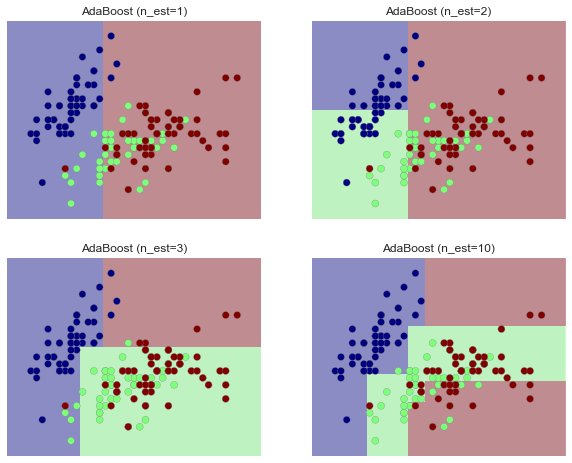

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# iris data already loaded earlier

# using a very small decision tree (max_depth=1) as the base learner
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_2d_classification(boosting, X, ax=ax, alpha=.4)
    sc = ax.scatter(X[:,0], X[:,1], c=y, cmap='jet', edgecolors='grey')
    plt.title(label)
    
plt.show()

We can observe in this example, that each base learner consists of a decision tree with depth 1. In the first case, since only a single decision tree (estimator) is used, classification of the data is based on a feature threshold that partitions the space into two regions separated by a linear decision surface that is parallel to one of the axes. Interesting things happen after this. With two separate decision trees (both depth 1), both are performed sequentially, with the weights of specific samples increased whenever they are misclassified (for e.g. the green dots in the blue region in the first case must have got their weights changed drastically). In other words, the "boosting" process can be seen like a sequential process of modifying the weights of the input samples such that a strong rule is produced by combining individual weak decision stumps.

![](resources/boosting-figure.png)

In [ ]:
boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)   
plot_learning_curve(boosting, X, y)

**Try**: [Gradient Tree Boosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) - Another boosting algorithm. The basic concept remains the same, except here we do not play with the weights, but fit the model on residuals (measurement of the difference in prediction and original outcome) rather than original outcomes. It can be used for both regression and classification problems.

## Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

### Majority Class Labels

In majority voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier. E.g. if the prediction for a given sample is

* classifier 1 -> class 1
* classifier 2 -> class 1
* classifier 3 -> class 2

the VotingClassifier (with `voting='hard'`) would classify the sample as "class 1" based on the majority class label.
In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order. E.g. in the following scenario

* classifier 1 -> class 2
* classifier 2 -> class 1

the class label 1 will be assigned to the sample.

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.77 (+/- 0.07) [Logistic Regression]
Accuracy: 0.77 (+/- 0.07) [Random Forest]
Accuracy: 0.79 (+/- 0.05) [naive Bayes]
Accuracy: 0.79 (+/- 0.07) [Ensemble]


In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities. Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

To illustrate this with a simple example, lets assume we have 3 classifiers and a 3-class classification problems where we assign equal weights to all classifiers: $w1=1$, $w2=1$, $w3=1$.

![](resources/soft-voting-table.png)

Here, the predicted class label is 2, since it has the highest average probability.

In [17]:
from sklearn.svm import SVC

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
eclf = eclf.fit(X,y)

# do more stuff after this line...

for clf, label in zip([clf1, clf2, clf3, eclf], ['Decision Tree', 'KNN', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.05) [Decision Tree]
Accuracy: 0.79 (+/- 0.05) [KNN]
Accuracy: 0.82 (+/- 0.06) [SVC]
Accuracy: 0.81 (+/- 0.07) [Ensemble]


In [ ]:
scores.size

## Stacking

Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on the complete training set then the meta-model is trained on the outputs of these base level model as features. The base level often consists of different learning algorithms and therefore stacking ensembles are often *heterogeneous*.

Scikit-learn does not have functions to perform the stacking ensemble. But, you can try to implement one!

**Try**: Here's a rough guide of how to do it:
First, create three different classifiers, something like:

In [18]:
from sklearn.naive_bayes import GaussianNB

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

**Q3**: Then, use a Logistic Regression classifier as the "meta-classifier" to take in the outputs of the previous three models (`clf1`, `clf2`, `clf3`) as features to the meta-classifier. Since the outputs are discrete labels, they are not so good as features, as a lot of information is lost. Why not used the predicted probabilities instead?

Train again on the meta-classifier. Get final predicted labels.

In [23]:
from sklearn.model_selection import cross_val_predict

y_predict = []

for clf, label in zip([clf1, clf2, clf3], ['KNN', 'RFC', 'GNB']):
    y_predict.append(cross_val_predict(clf, X, y, cv=5))

In [26]:
print(y_predict)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1]

In [25]:
preds = np.vstack((y_predict[0],y_predict[1],y_predict[2])).T
print(preds)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 2 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 1 1]
 [2 2 2]
 [1 1 1]
 [2 2 2]
 [1 1 1]
 [1 1 2]
 [1 1 1]
 [1 1 1]
 [2 2 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 2]
 [1 1 1]
 [2 2 1]
 [1 1 1]
 [1 1 1]
 [2 2 1]
 [1 2 1]
 [2 2 1]
 [1 2 1]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 2 1]
 [1 1 1]
 [1 0 1]
 [2 2 2]
 [1 1 2]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 2 1]
 [1 1 1]
 [1 1 1]
 [2 1 1]
 [1 1 1]
 [1 1 1]
 [2 1 1]
 [2 1 1]
 [1 1 1]
 [2 2 2]
 [2 1 1]
 [2 2 2]
 [1 1 2]
 [2 2 2]
 [2 2 2]
 [1 1 1]
 [2 2 2]
 [1 1 2]
 [2 2 2]
 [1 2 2]
 

In [28]:
log_reg = LogisticRegression()

scores = cross_val_score(log_reg, preds, y, cv=3, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), "Stacking"))

Accuracy: 0.75 (+/- 0.01) [Stacking]


Some extra information can be taken from here:


##### General intro: 

https://www.youtube.com/watch?v=Un9zObFjBH0

https://www.youtube.com/watch?v=Yvn3--rIdZg


##### Bagging:

100 second explanation: https://www.youtube.com/watch?v=sVriC_Ys2cw

Simple explanation: https://www.youtube.com/watch?v=2Mg8QD0F1dQ

Some details: https://www.youtube.com/watch?v=Rm6s6gmLTdg


##### Boosting:

Simple explanation: https://www.youtube.com/watch?v=GM3CDQfQ4sw

Some details: https://www.youtube.com/watch?v=ix6IvwbVpw0



